<br/><br/>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>Real Estate Egypt</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#libraries" style="font-size:15px; color:#1D2951">Importing Libraries</a></li>
<li><a href="#web" style="font-size:15px; color:#1D2951">Collecting Data (Web Scraping)</a></li>
<li><a href="#overview" style="font-size:15px; color:#1D2951">Dataset Overview</a></li>
<li><a href="#eda" style="font-size:15px; color:#1D2951">Data Exploratory</a></li>
<li><a href="#powerbi" style="font-size:15px; color:#1D2951">Embedding PowerBi Dashboard</a></li>
<li><a href="#dpm" style="font-size:15px; color:#1D2951">Data Preparation for Modeling</a></li>
<li><a href="#autogluon" style="font-size:15px; color:#1D2951">Apply Autogluon</a></li>

</ul>

<hr>

<a id='libraries' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Importing Libraries</b></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from itertools import zip_longest
import concurrent.futures
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from autogluon.tabular import TabularPredictor

from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication

<a id='web' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Web Scraping</b></a>

In [ ]:
NUM_PAGES = 846
page_num = 1

city = []
pricing = []
home = []
bedRoom = []
bathRoom = []
area = []

links = []

while page_num <= NUM_PAGES:

    houses = requests.get(f'https://realestate.eg/en/search?project_type=residential&property_page={page_num}')
    content = houses.content
    # Parse a content
    soup = BeautifulSoup(content, 'lxml')

    housesLocation = soup.find_all('div', {"class":"location-wrapper"})
    housesPrices = soup.find_all('span', {"class":"number"})
    attribute = soup.find_all('ul',{"class":"list-inline listing__attribute"})

    for i in range(20,len(housesPrices)):
        pricing.append(housesPrices[i].text)

    for i in range(len(attribute)):
        city.append(housesLocation[i].find('div',{'class':'location'}).text)
        links.append(housesLocation[i].find('a').attrs['href'])

        housesLocation[0].find('div',{'class':'location'}).text
        home.append(attribute[i].find_all('li')[0].text)
        bedRoom.append(attribute[i].find_all('li')[1].text)
        bathRoom.append(attribute[i].find_all('li')[2].text)
        area.append(attribute[i].find_all('li')[3].text)

    page_num +=1


In [ ]:
# Extraction from inner pages using Multi-Threading to minimze time processing

# st = time.time()



# def linksExtraction(link):
#     try: 
#         result = requests.get(link)
#         content = result.content
#         soup = BeautifulSoup(content, 'lxml')


#         developed = soup.find_all('span',{'class':'value'})
#         developed_by = developed[2].text

#         return developed_by
#     except:
#         pass

    
# with open("Test_File.csv",'w') as myfile:
#     writer = csv.writer(myfile)
#     writer.writerow(['Developed By'])
# #     linkNum = 1
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         result = executor.map(linksExtraction,links)
#         for elem in result:
#             writer.writerow([elem])
# #             linkNum +=1
            
# #             print("LinkNum", linkNum)

# et = time.time()

# print(f'Execution time: {round(et - st,2)} seconds')

In [ ]:
realEstate_Egypt = pd.DataFrame(list(zip(
    city, pricing,area,bedRoom,bathRoom, home
                          )), columns =
                  ['City', 'Price','Area','Numbers of Bedroom','Numbers of Bathroom','Type']) 

realEstate_Egypt.head()

In [ ]:
realEstate_Egypt.to_csv('realEstate.csv',index=False)

<a id='overview' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Overview</b></a>

In [2]:
realEstate_Egypt = pd.read_csv('realEstate.csv')
realEstate_Egypt.head()

,City,Price,Area,Numbers of Bedroom,Numbers of Bathroom,Type
0,New Administrative Capital,"3,000,000",120 m2,2.0,2.0,apartment
1,New Administrative Capital,"4,175,000",167 m2,3.0,2.0,apartment
2,New Administrative Capital,"5,000,000",200 m2,3.0,3.0,apartment
3,New Administrative Capital,"3,450,000",138 m2,2.0,2.0,apartment
4,New Administrative Capital,"3,650,000",146 m2,3.0,2.0,apartment


In [3]:
realEstate_Egypt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16908 entries, 0 to 16907
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 16908 non-null  object 
 1   Price                16908 non-null  object 
 2   Area                 16908 non-null  object 
 3   Numbers of Bedroom   16881 non-null  float64
 4   Numbers of Bathroom  16880 non-null  float64
 5   Type                 16896 non-null  object 
dtypes: float64(2), object(4)
memory usage: 792.7+ KB


In [4]:
realEstate_Egypt = realEstate_Egypt.dropna()
realEstate_Egypt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16865 entries, 0 to 16907
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 16865 non-null  object 
 1   Price                16865 non-null  object 
 2   Area                 16865 non-null  object 
 3   Numbers of Bedroom   16865 non-null  float64
 4   Numbers of Bathroom  16865 non-null  float64
 5   Type                 16865 non-null  object 
dtypes: float64(2), object(4)
memory usage: 922.3+ KB


In [5]:
realEstate_Egypt.insert(2, "Currency", 'LE')
realEstate_Egypt.insert(4,"Unit", 'm2')
realEstate_Egypt['Area'] = realEstate_Egypt['Area'].apply(lambda row: row[:-3])

In [6]:
realEstate_Egypt.head()

,City,Price,Currency,Area,Unit,Numbers of Bedroom,Numbers of Bathroom,Type
0,New Administrative Capital,"3,000,000",LE,120,m2,2.0,2.0,apartment
1,New Administrative Capital,"4,175,000",LE,167,m2,3.0,2.0,apartment
2,New Administrative Capital,"5,000,000",LE,200,m2,3.0,3.0,apartment
3,New Administrative Capital,"3,450,000",LE,138,m2,2.0,2.0,apartment
4,New Administrative Capital,"3,650,000",LE,146,m2,3.0,2.0,apartment


In [7]:
realEstate_Egypt.to_csv('realEstate_Egypt_Cleaned.csv')

In [8]:
# Convert Datatype 
realEstate_Egypt[["Area",'Numbers of Bedroom','Numbers of Bathroom']] =  realEstate_Egypt[["Area",'Numbers of Bedroom','Numbers of Bathroom']].apply(pd.to_numeric)
realEstate_Egypt['Price'] = realEstate_Egypt['Price'].str.replace(',','').astype(int)

In [9]:
realEstate_Egypt.head()

,City,Price,Currency,Area,Unit,Numbers of Bedroom,Numbers of Bathroom,Type
0,New Administrative Capital,3000000,LE,120,m2,2.0,2.0,apartment
1,New Administrative Capital,4175000,LE,167,m2,3.0,2.0,apartment
2,New Administrative Capital,5000000,LE,200,m2,3.0,3.0,apartment
3,New Administrative Capital,3450000,LE,138,m2,2.0,2.0,apartment
4,New Administrative Capital,3650000,LE,146,m2,3.0,2.0,apartment


In [10]:
realEstate_Egypt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16865 entries, 0 to 16907
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 16865 non-null  object 
 1   Price                16865 non-null  int32  
 2   Currency             16865 non-null  object 
 3   Area                 16865 non-null  int64  
 4   Unit                 16865 non-null  object 
 5   Numbers of Bedroom   16865 non-null  float64
 6   Numbers of Bathroom  16865 non-null  float64
 7   Type                 16865 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 1.1+ MB


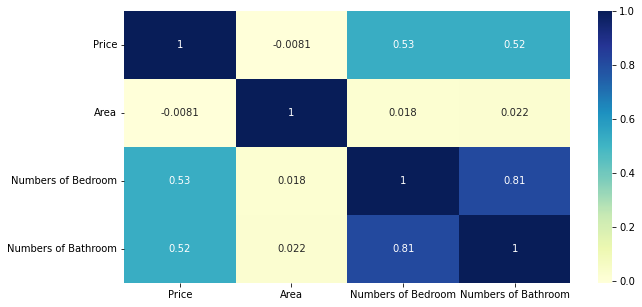

In [11]:
# Let's Check the Correlation between columns
corrmat = realEstate_Egypt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))

g = sns.heatmap(realEstate_Egypt[top_corr_features].corr(), annot= True, cmap = "YlGnBu")

In [12]:
def decorate_barPlots(ax, title='TITLE', hideAxes=True, direction='v', rotateTextdeg=0):
    '''
        ax : matplotlib.axes._subplots.AxesSubplot
        hideAxes : Hide right and top axes of the plot
        annotate : add numbers related to bar sizes
        direction : v or h which stands for vertical and horizontal
    '''

    if direction == 'v':
        for p in ax.patches:
            bar_length = round(p.get_height(), 4)
            ax.annotate(str(bar_length), xy=(p.get_x() + p.get_width() / 2.0, bar_length),
            xytext=(3, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            rotation = rotateTextdeg
                       )
    elif direction == 'h':
        for p in ax.patches:
            bar_length = round(p.get_width(), 4)
            ax.annotate(str(bar_length), xy=(bar_length, p.get_y() + (p.get_height() / 2.0)),
            xytext=(25, 1),
            textcoords='offset points',
            ha='center', # Horizontal Alignment: 'center', 'right', 'left'
            va='center_baseline', # Vertical Alignment:'top', 'bottom', 'center', 'baseline', 'center_baseline'
            rotation = rotateTextdeg
                                )
    else:
        print('Not Annotated!')


    if hideAxes:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    title_obj = ax.set_title(f'{title}', pad=20, fontsize=15)
    plt.setp(title_obj, color='#1D2951');

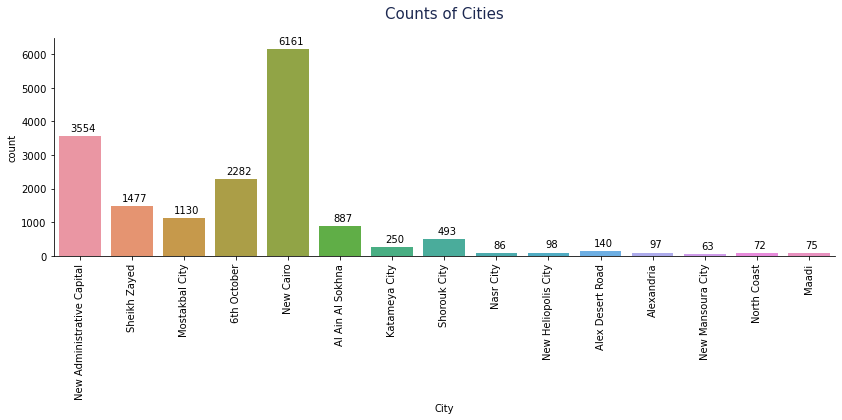

In [13]:
ax = sns.countplot(data=realEstate_Egypt, x='City') # palette='crest'
decorate_barPlots(ax, title='Counts of Cities', direction='v')

plt.xticks(rotation=90)

plt.gcf().set_size_inches(14, 4);

###### It's clear that most of city in dataset from Sheikh Zayed city, so maybe that will have negative impact on the next processing.

In [14]:
# ax = sns.barplot(data = realEstate_Egypt, x="Developed By", y="Price",color="#4D76D3")

# decorate_barPlots(ax, title='Average Number of Investors per each Income Range', direction='v')

# plt.xlabel("Companies",size=12)
# plt.ylabel("Average Price", size=12)
# plt.xticks(rotation = 15)
# plt.title("Relation Between Companies and Price", size=12)
# plt.gcf().set_size_inches(12, 4);

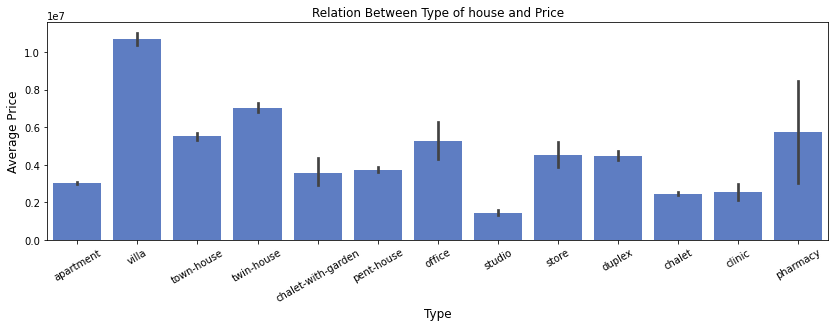

In [15]:
sns.barplot(data = realEstate_Egypt, x="Type", y="Price",color="#4D76D3")
plt.xlabel("Type",size=12)
plt.ylabel("Average Price", size=12)
plt.title("Relation Between Type of house and Price")
plt.xticks(rotation=30)
plt.gcf().set_size_inches(14, 4);

In [16]:
# sns.lineplot(data = realEstate_Egypt, x="Area", y="Price",color="#4D76D3")
# plt.xlabel("Area",size=12)
# plt.ylabel("Average Price", size=12)
# plt.xticks(rotation = 90)
# plt.title("Relation Between Area and Price", size=12)
# plt.gcf().set_size_inches(12, 4);

###### It's clear that the Area Effect on the salaries, but in 250 m2 There is a problem which is there are many houses with this size in different area, So maybe this huge difference in price affected by the location of the city. So let's make a correlation between City and Price

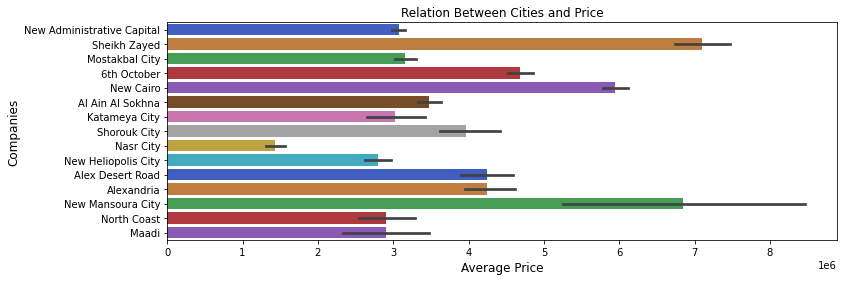

In [17]:
sns.barplot(data = realEstate_Egypt, x="Price", y="City",
            palette ='bright',
            saturation = 0.5)


plt.xlabel("Average Price",size=12)
plt.ylabel("Companies", size=12)
plt.title("Relation Between Cities and Price", size=12)
plt.gcf().set_size_inches(12, 4);

###### There are many other charts available on Power BI Dashboard 

<a id='powerbi' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Embedding PowerBI</b></a>

In [ ]:
device_auth = DeviceCodeLoginAuthentication()

In [ ]:
group_id='7fc2533d-8c14-4af6-bf23-bb8a150f0bb3'
report_id='f6fdb2b1-8d65-43e5-a1ce-aa321de4410f'

In [ ]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

In [ ]:
report

###### Let's Make a Model to Predict the House Pricing depending on the other features

In [18]:
# Select features, applying scaler and transform catagorical data into numeric to can apply model on it.

# target = realEstate_Egypt['Price']
# features = realEstate_Egypt[['City','Area','Numbers of Bathroom','Numbers of Bedroom','Developed By','Type']]
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)
# X_train = pd.get_dummies(X_train, columns = ['City','Developed By','Type'])
# X_test  = pd.get_dummies(X_test, columns = ['City','Developed By','Type'])


# Apply Scaler to Target column

# y_train = y_train.to_numpy().reshape(-1,1)
# y_train = scaler.fit_transform(y_train)
# y_train = pd.DataFrame(y_train, columns=['Price'])

# y_test = y_train.to_numpy().reshape(-1,1)
# y_test = scaler.fit_transform(y_train)
# y_test = pd.DataFrame(y_train, columns=['Price'])

###### But I'll use AutoGluon here instead of above method.

<a id='dpm' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Preparation for Modeling</b></a>

In [19]:
featureSelection = realEstate_Egypt.drop(['Currency', 'Unit'], axis=1)

In [20]:
featureSelection.head(5)

,City,Price,Area,Numbers of Bedroom,Numbers of Bathroom,Type
0,New Administrative Capital,3000000,120,2.0,2.0,apartment
1,New Administrative Capital,4175000,167,3.0,2.0,apartment
2,New Administrative Capital,5000000,200,3.0,3.0,apartment
3,New Administrative Capital,3450000,138,2.0,2.0,apartment
4,New Administrative Capital,3650000,146,3.0,2.0,apartment


In [21]:
featureSelection['Type'].value_counts()

apartment             9864
villa                 2829
town-house            1154
twin-house             880
pent-house             613
duplex                 608
chalet                 539
studio                 121
store                  111
office                  95
clinic                  32
chalet-with-garden      17
pharmacy                 2
Name: Type, dtype: int64

In [22]:
# Let's drop Pharmacy from the data because maybe it'll cause misleading for the model
i = featureSelection[featureSelection['Type'] == 'pharmacy'].index
featureSelection = featureSelection.drop(i)

In [23]:
featureSelection['Type'].value_counts()

apartment             9864
villa                 2829
town-house            1154
twin-house             880
pent-house             613
duplex                 608
chalet                 539
studio                 121
store                  111
office                  95
clinic                  32
chalet-with-garden      17
Name: Type, dtype: int64

In [24]:
train, test = train_test_split(featureSelection, test_size=0.33)

In [25]:
train = pd.get_dummies(train, columns = ['City','Type'])
test  = pd.get_dummies(test, columns = ['City','Type'])

scaler = MinMaxScaler()
for col in [train, test]:
    col.loc[:] = scaler.fit_transform(col.loc[:])

In [26]:
train.head()

,Price,Area,Numbers of Bedroom,Numbers of Bathroom,City_6th October,City_Al Ain Al Sokhna,City_Alex Desert Road,City_Alexandria,City_Katameya City,City_Maadi,...,Type_chalet-with-garden,Type_clinic,Type_duplex,Type_office,Type_pent-house,Type_store,Type_studio,Type_town-house,Type_twin-house,Type_villa
11864,0.022837,0.059796,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6659,0.041533,0.083333,0.4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0.050680,0.089059,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7647,0.034079,0.062977,0.4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.029666,0.032761,0.2,0.2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='autogluon' style="font-size:30px; color:#1D2951; text-decoration:none"><b>AutoGluon</b></a>

In [27]:
predictor = TabularPredictor(label="Price").fit(train_data= train, time_limit=600,
                                                presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220821_053225\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220821_053225\"
AutoGluon Version:  0.5.0
Python Version:     3.7.3
Operating System:   Windows
Train Data Rows:    11298
Train Data Columns: 30
Label Column: Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.0, 0.05758, 0.06669)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9156.33 MB
	Train Data (Original)  Memory Usage: 2

AutoGluon training complete, total runtime = 602.66s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220821_053225\")


In [28]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -0.034050      51.450537  405.656064                0.001001           0.804056            3       True         19
1     ExtraTreesMSE_BAG_L2  -0.034633      37.192380  310.183087                1.038403           5.467661            2       True         17
2   NeuralNetFastAI_BAG_L2  -0.034724      37.205191  357.460263                1.051213          52.744838            2       True         18
3      WeightedEnsemble_L2  -0.034813      35.448876  299.402450                0.001000           0.740826            2       True         12
4          CatBoost_BAG_L2  -0.035015      36.224630  334.919173                0.070652          30.203748            2       True         16
5   RandomForestMSE_BAG_L2  -0.035429      37.252130  320.518407                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

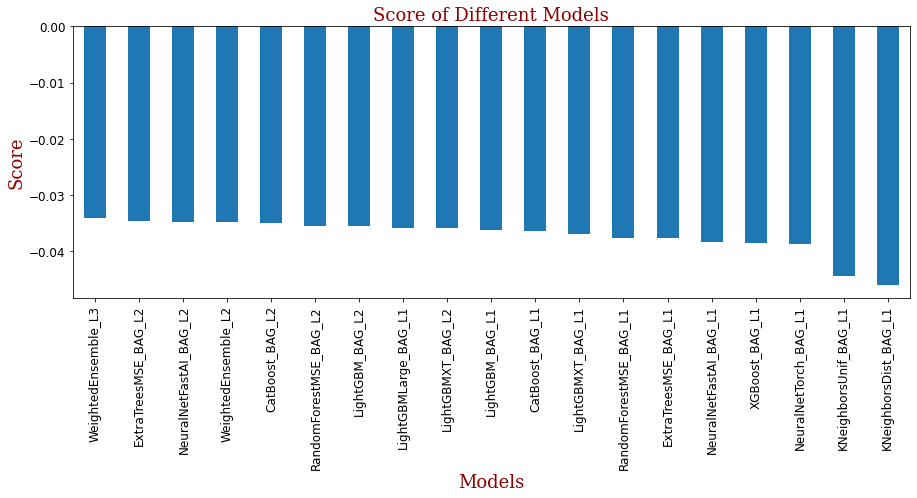

In [29]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

predictor.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val",figsize=(15,5), legend = False,fontsize=12)

plt.title("Score of Different Models",fontdict=font)
plt.xlabel('Models', fontdict=font)
plt.ylabel('Score', fontdict=font);

In [30]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE_BAG_L1,-0.052638,-0.037676,0.451557,0.833469,2.747112,0.451557,0.833469,2.747112,1,True,7
1,LightGBMXT_BAG_L1,-0.054945,-0.036836,18.749548,30.516771,29.703499,18.749548,30.516771,29.703499,1,True,3
2,CatBoost_BAG_L1,-0.056539,-0.036288,0.230379,0.056834,32.558244,0.230379,0.056834,32.558244,1,True,6
3,ExtraTreesMSE_BAG_L2,-0.057052,-0.034633,29.357691,37.192380,310.183087,0.664035,1.038403,5.467661,2,True,17
4,LightGBMXT_BAG_L2,-0.057584,-0.035856,36.161868,48.990129,339.566167,7.468212,12.836152,34.850741,2,True,13
5,KNeighborsDist_BAG_L1,-0.058265,-0.045994,0.129084,0.223643,0.051003,0.129084,0.223643,0.051003,1,True,2
6,KNeighborsUnif_BAG_L1,-0.058295,-0.044317,0.124806,0.241825,0.429016,0.124806,0.241825,0.429016,1,True,1
7,RandomForestMSE_BAG_L2,-0.058719,-0.035429,29.340558,37.252130,320.518407,0.646902,1.098152,15.802982,2,True,15
8,WeightedEnsemble_L3,-0.059205,-0.034050,38.823453,51.450537,405.656064,0.005381,0.001001,0.804056,3,True,19
9,CatBoost_BAG_L2,-0.060530,-0.035015,28.850731,36.224630,334.919173,0.157075,0.070652,30.203748,2,True,16


In [31]:
performance = predictor.evaluate(test)

Evaluation: root_mean_squared_error on test data: -0.059205187498900885
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.059205187498900885,
    "mean_squared_error": -0.003505254226780002,
    "mean_absolute_error": -0.028692954476445955,
    "r2": 0.06040912652144126,
    "pearsonr": 0.5520768196303508,
    "median_absolute_error": -0.012265478174507526
}


#### As we see the accuracy is pretty low for many reason., firstly, the features is not enough for training the model. Secondly, size of data is pretty low for all of these different type (Studio, Chalet, Clinic, Apartment, Store, Office,..etc) so it need higher data to perform well